--> INSTALLING DEPENDENCIES:

In [ ]:
#!pip install pyyaml h5py
#!pip install tensorflow
#!pip install keras-utils

--> IMPORTING DEPENDENCIES:

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

--> MOUNTING GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--> Importing training dataset

In [ ]:
DATASET="/content/drive/MyDrive/train_dataset"

CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])


--> Imorting validation dataset

In [ ]:
test_data=[]
DATASET2="/content/drive/MyDrive/valid_dataset"
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

18345
4585


--> Assigning Labels and Features

In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])
    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)


7
1
2
4
6
3
4
1
5
7


In [ ]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)

(18345, 18345)

In [ ]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(4585, 4585)

--> Image Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

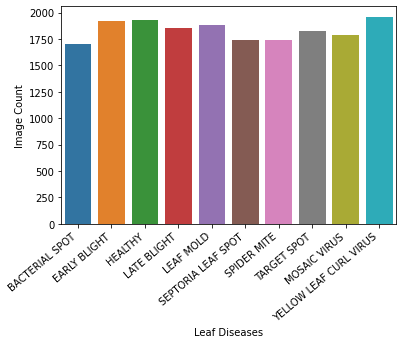

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

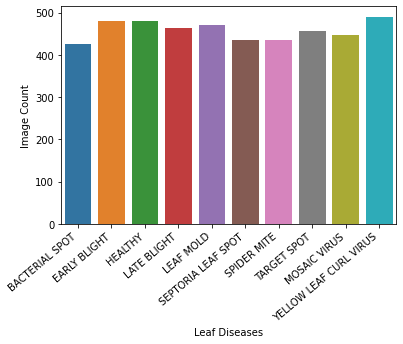

In [ ]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [ ]:
one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

--> Creating Model

In [ ]:
def create_model():
  classifier=Sequential()

  classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
  classifier.add(MaxPooling2D(pool_size=(2,2)))
  classifier.add(Dropout(0.2))

  classifier.add(Conv2D(64,(3,3), activation='relu'))
  classifier.add(MaxPooling2D(pool_size=(2,2)))
  classifier.add(Dropout(0.2))

  classifier.add(Conv2D(128,(3,3), activation='relu'))
  classifier.add(MaxPooling2D(pool_size=(2,2)))
  classifier.add(Dropout(0.4))

  classifier.add(Flatten())

  classifier.add(Dense(activation='relu', units=64))
  classifier.add(Dense(activation='relu', units=128))
  classifier.add(Dense(activation='relu', units=64))
  classifier.add(Dense(activation='softmax', units=10))

  classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return classifier

model=create_model()
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 64)       

--> Training Model and evaluating it

In [ ]:
hist=model.fit(X_train,one_hot_train,epochs=75,batch_size=128,validation_split=0.2)

test_loss,test_acc=model.evaluate(X_test,one_hot_test)
test_loss,test_acc


Epoch 1/75
115/115 [==============================] - 15s 28ms/step - loss: 1.9361 - accuracy: 0.2721 - val_loss: 1.4319 - val_accuracy: 0.5097
Epoch 2/75
115/115 [==============================] - 2s 21ms/step - loss: 1.1230 - accuracy: 0.6021 - val_loss: 0.8364 - val_accuracy: 0.7195
Epoch 3/75
115/115 [==============================] - 2s 21ms/step - loss: 0.7641 - accuracy: 0.7321 - val_loss: 0.7601 - val_accuracy: 0.7223
Epoch 4/75
115/115 [==============================] - 2s 21ms/step - loss: 0.6207 - accuracy: 0.7823 - val_loss: 0.5695 - val_accuracy: 0.8005
Epoch 5/75
115/115 [==============================] - 2s 21ms/step - loss: 0.5275 - accuracy: 0.8140 - val_loss: 0.4553 - val_accuracy: 0.8487
Epoch 6/75
115/115 [==============================] - 2s 21ms/step - loss: 0.4720 - accuracy: 0.8356 - val_loss: 0.4029 - val_accuracy: 0.8643
Epoch 7/75
115/115 [==============================] - 2s 21ms/step - loss: 0.4240 - accuracy: 0.8530 - val_loss: 0.4725 - val_accuracy: 0.835

(0.1617555171251297, 0.9533260464668274)

--> Loss Graph

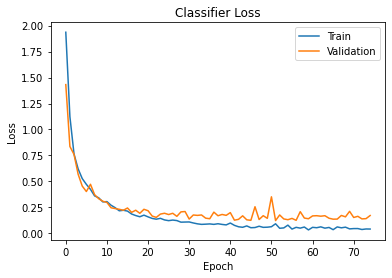

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

--> Accuracy Graph

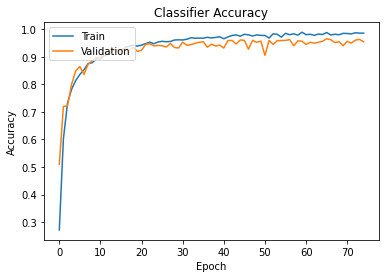

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(X_test)
classes=np.argmax(y_pred,axis=1)
classes

array([0, 8, 9, ..., 3, 1, 0])

In [ ]:
y_prob=model.predict(X_test)
prob_y_classes=np.argmax(y_prob, axis=1)
prob_y_classes

array([0, 8, 9, ..., 3, 1, 0])

--> Roc curve for all disease classes

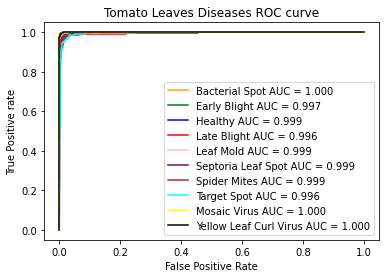

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


--> heat map confusion matrix and default confusion matrix

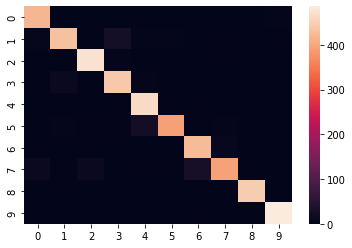

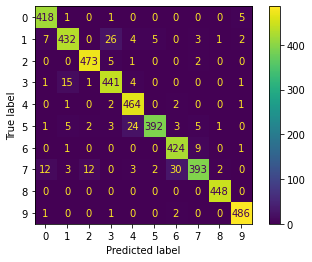

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
sns.heatmap(confusion_matrix(y_test,classes))
cm=confusion_matrix(y_test,classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

--> Saving Model

In [ ]:
model=create_model()
model.fit(X_train,one_hot_train,epochs=75,batch_size=128,validation_split=0.2)
model.save("model.h5")

Epoch 1/75
115/115 [==============================] - 4s 26ms/step - loss: 1.9601 - accuracy: 0.2864 - val_loss: 1.5023 - val_accuracy: 0.4939
Epoch 2/75
115/115 [==============================] - 3s 22ms/step - loss: 1.1528 - accuracy: 0.5955 - val_loss: 0.9395 - val_accuracy: 0.6634
Epoch 3/75
115/115 [==============================] - 2s 21ms/step - loss: 0.8190 - accuracy: 0.7142 - val_loss: 0.8529 - val_accuracy: 0.7067
Epoch 4/75
115/115 [==============================] - 2s 21ms/step - loss: 0.6195 - accuracy: 0.7802 - val_loss: 0.5466 - val_accuracy: 0.8122
Epoch 5/75
115/115 [==============================] - 2s 21ms/step - loss: 0.5421 - accuracy: 0.8091 - val_loss: 0.5741 - val_accuracy: 0.7967
Epoch 6/75
115/115 [==============================] - 2s 21ms/step - loss: 0.4855 - accuracy: 0.8269 - val_loss: 0.6441 - val_accuracy: 0.7661
Epoch 7/75
115/115 [==============================] - 2s 21ms/step - loss: 0.4343 - accuracy: 0.8489 - val_loss: 0.3485 - val_accuracy: 0.8844

--> Loading Model

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 64)       

--> Evaluating Loaded Model

In [ ]:
loss, acc = new_model.evaluate(X_test, one_hot_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

144/144 [==============================] - 1s 4ms/step - loss: 0.1688 - accuracy: 0.9514
Restored model, accuracy: 95.14%


--> Doing Predictions using model

In [ ]:
path = "/content/drive/MyDrive/valid_dataset/Tomato___Septoria_leaf_spot/021f9747-f308-4694-859b-10f541a0e63c___JR_Sept.L.S 2506.JPG"

def single_prediction(path):
    img=cv.imread(path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img=cv.resize(img,(64,64))
    return img.reshape(-1,64,64,3)

x = tf.keras.Input(shape=(64,64,3))
y = tf.keras.layers.Dense(16, activation='softmax')(x)
    
model_new = tf.keras.Model(x, y)
model_new.summary()

prediction = new_model.predict(single_prediction(path))
r=np.argmax(prediction,axis=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 dense_2 (Dense)             (None, 64, 64, 16)        64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
types=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']
class_result=types[r[0]]
print(r)
print(class_result)

[5]
SEPTORIA LEAF SPOT
